In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# List of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

In [3]:
# Load the entire data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 171s 1us/step


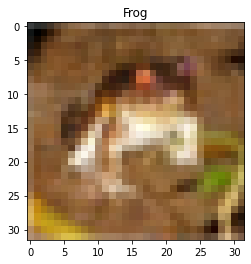

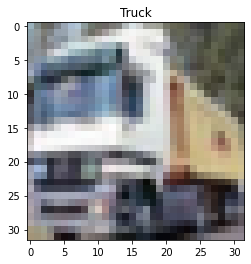

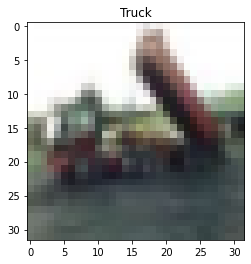

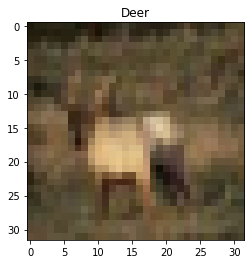

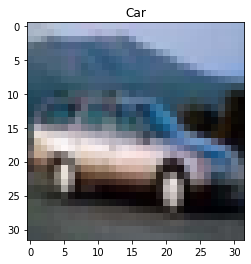

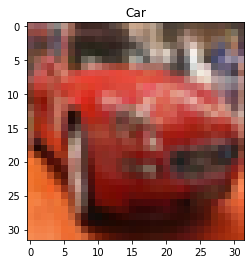

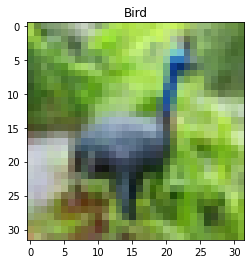

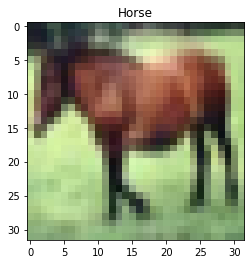

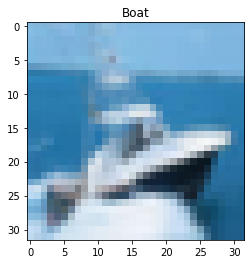

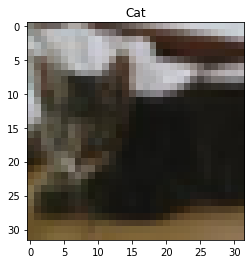

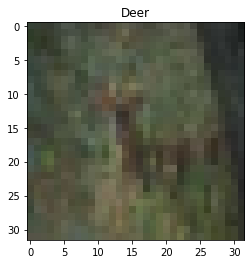

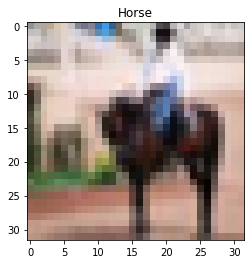

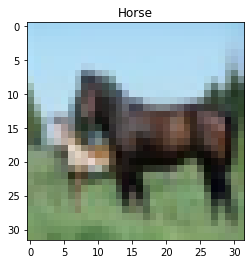

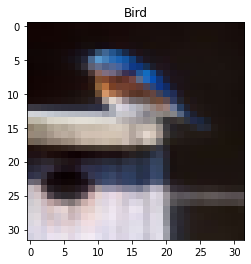

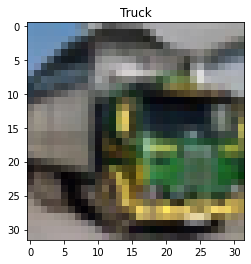

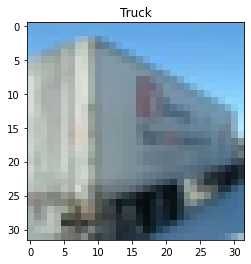

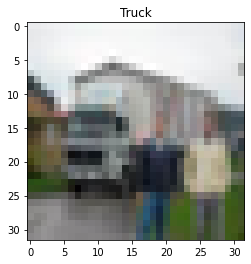

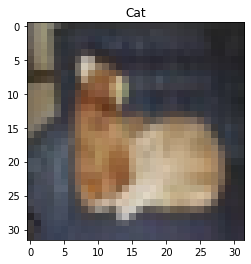

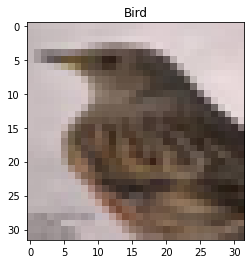

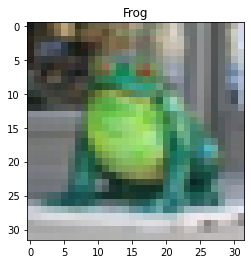

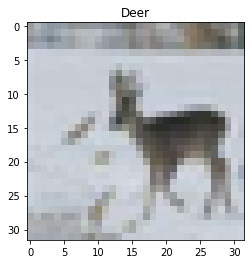

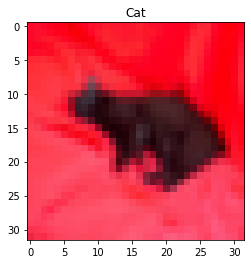

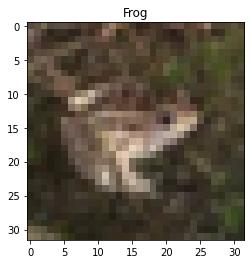

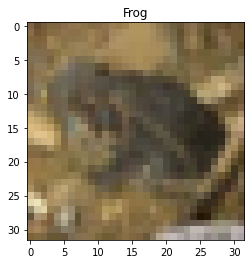

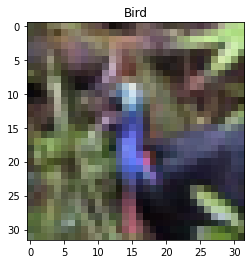

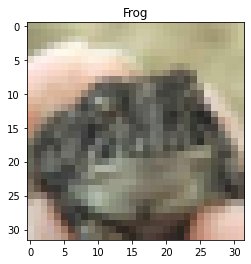

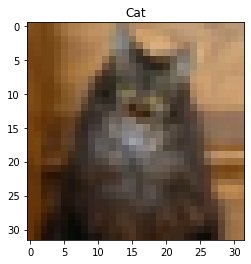

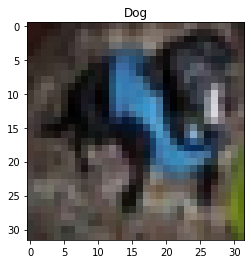

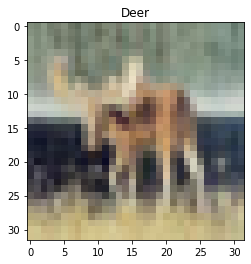

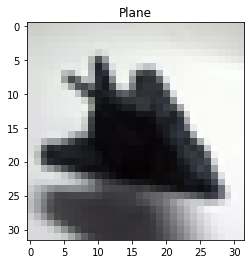

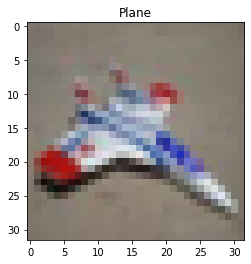

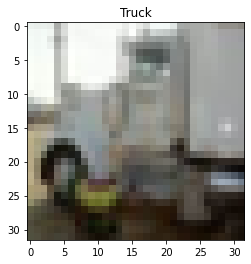

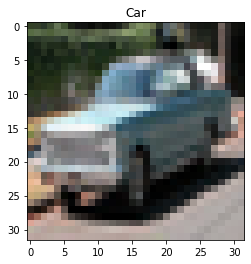

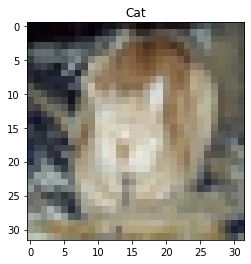

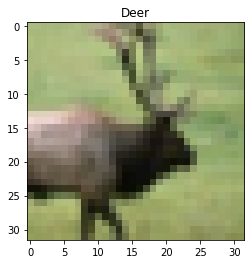

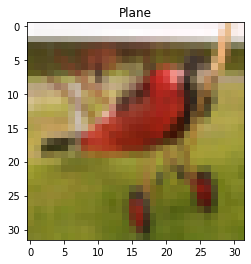

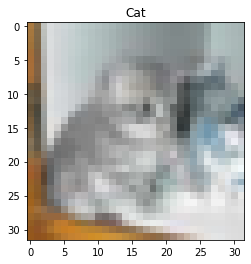

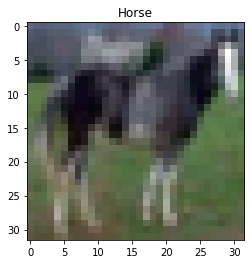

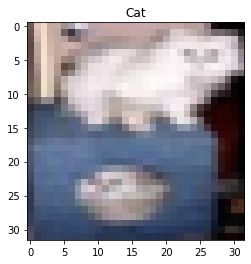

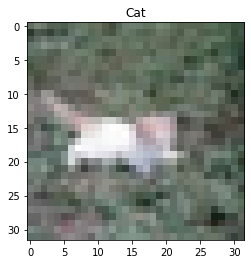

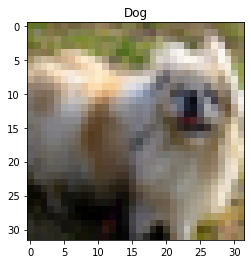

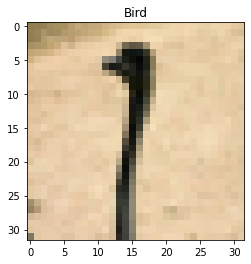

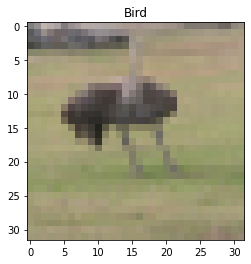

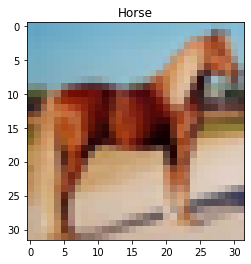

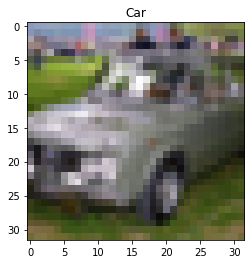

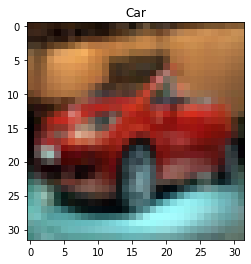

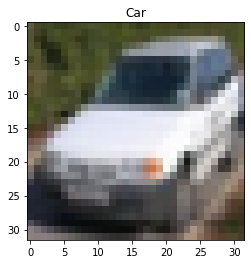

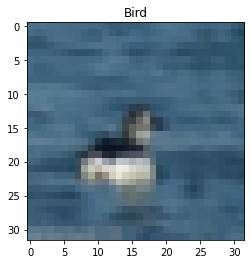

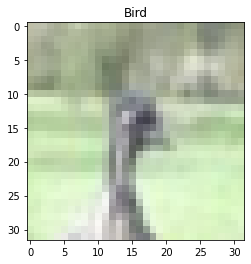

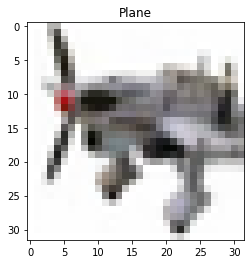

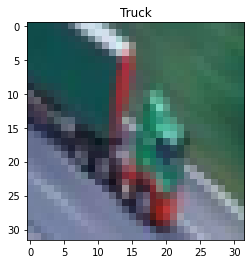

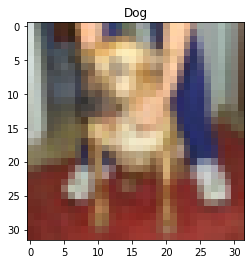

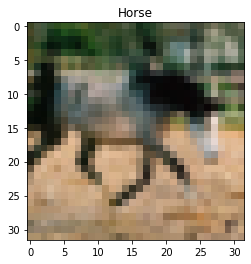

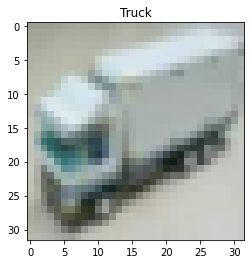

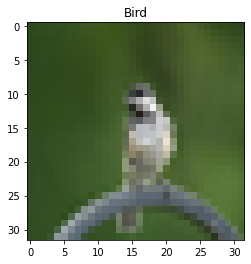

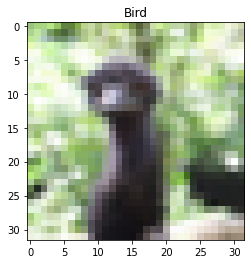

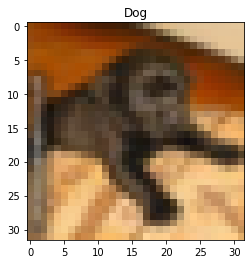

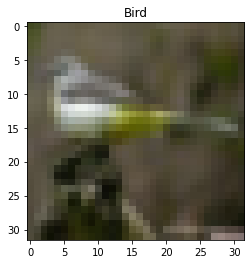

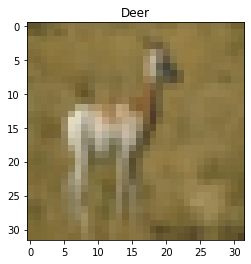

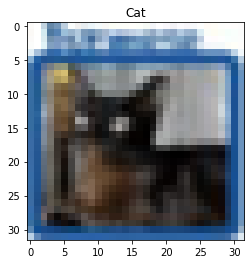

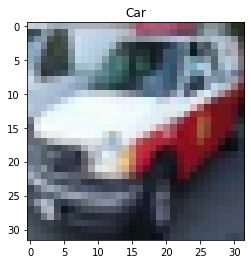

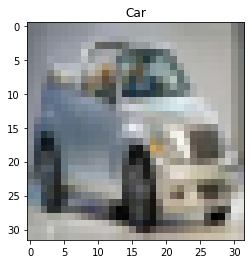

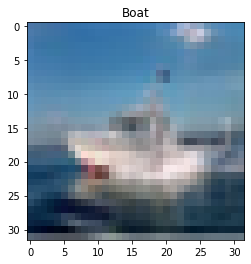

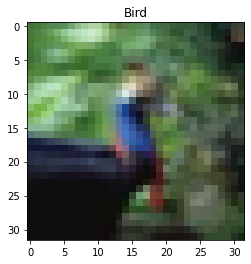

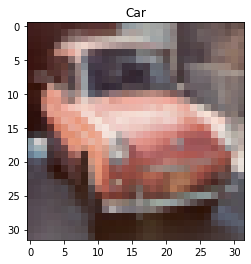

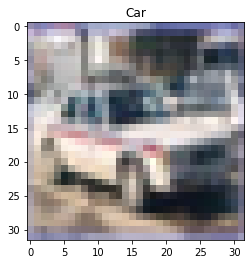

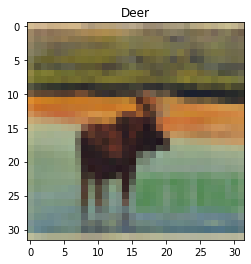

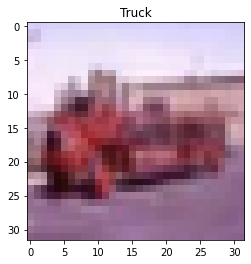

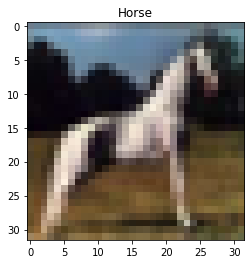

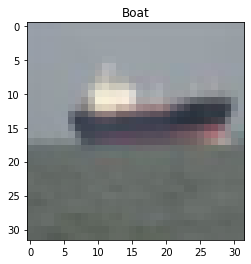

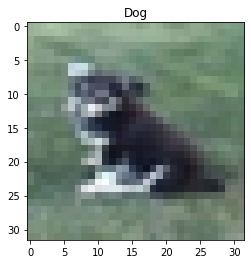

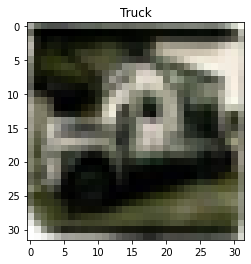

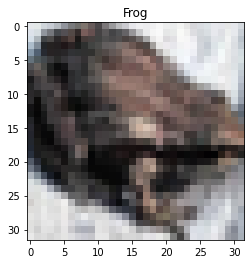

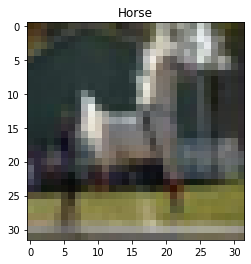

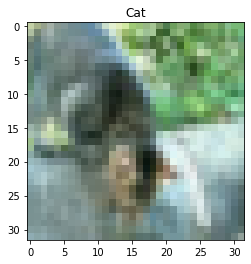

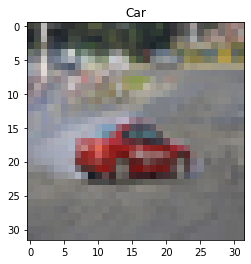

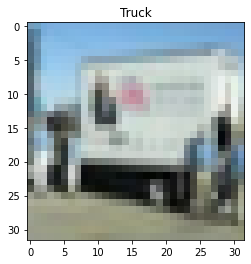

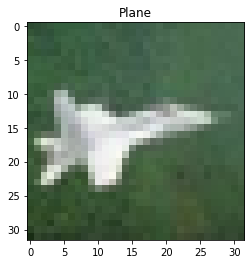

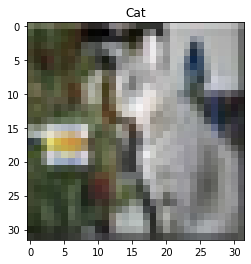

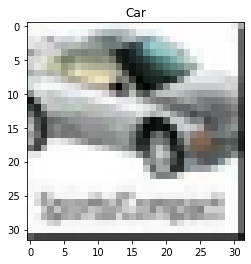

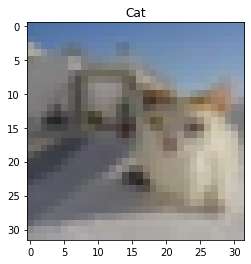

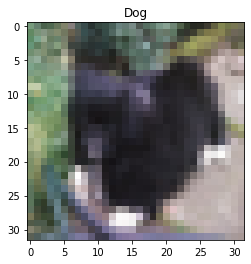

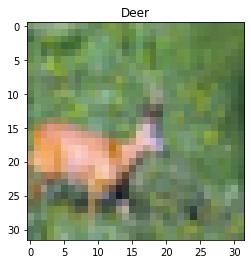

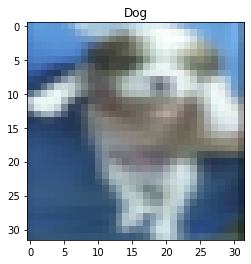

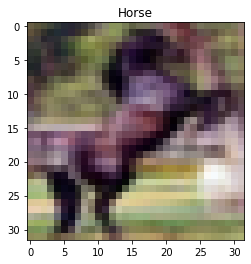

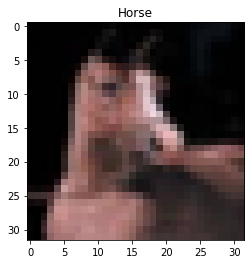

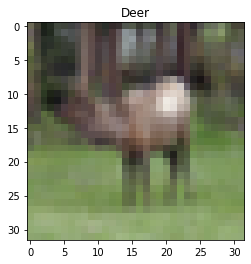

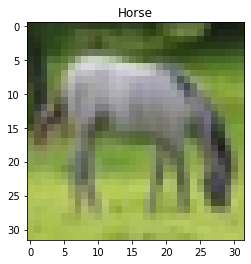

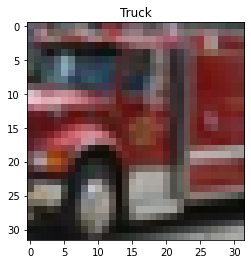

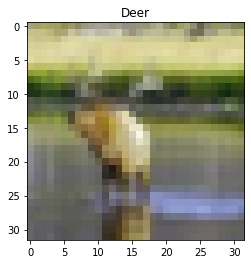

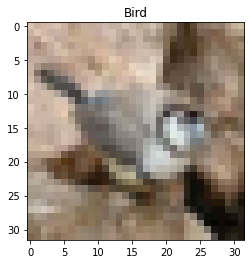

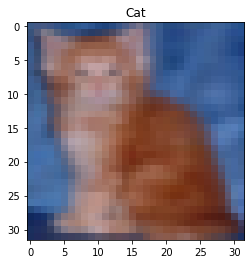

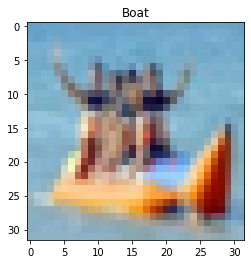

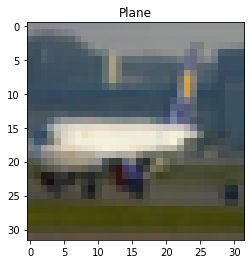

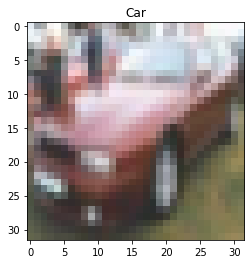

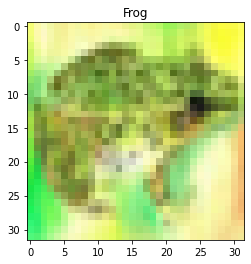

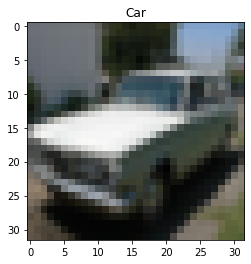

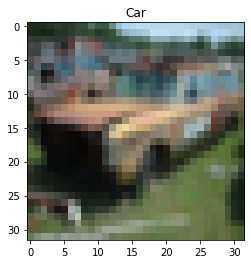

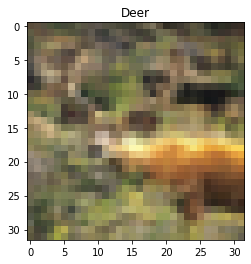

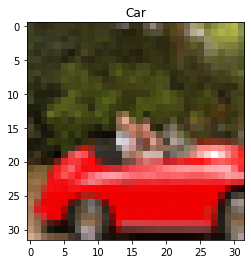

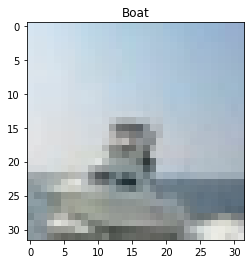

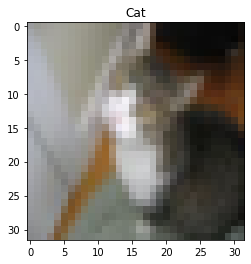

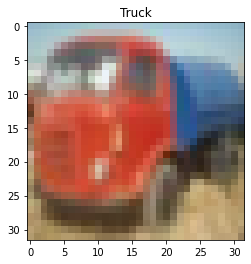

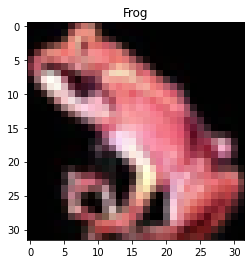

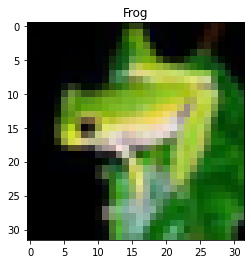

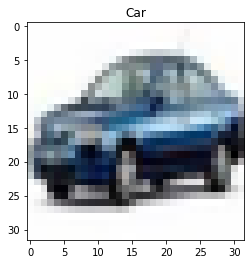

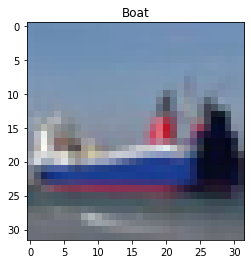

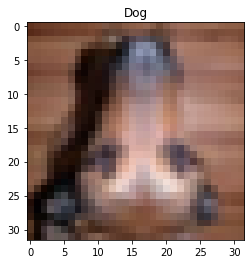

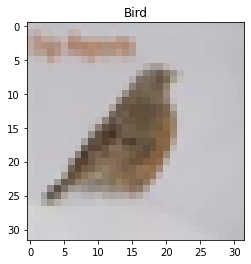

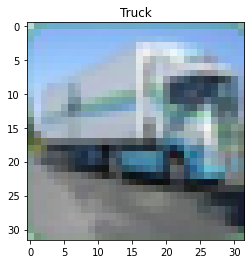

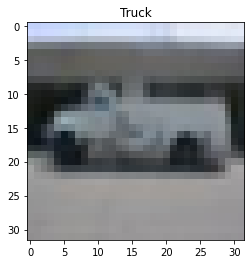

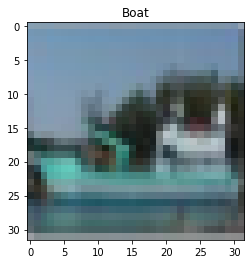

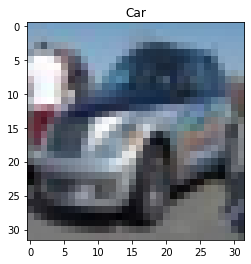

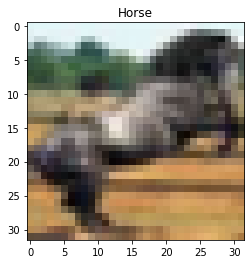

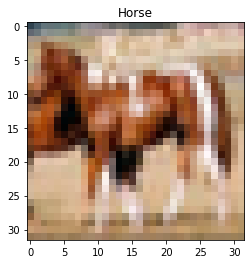

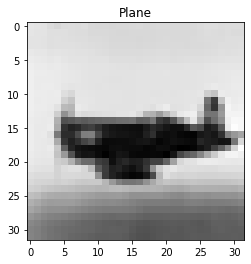

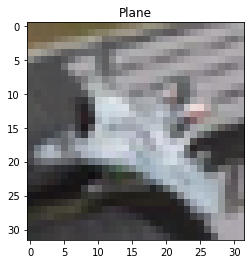

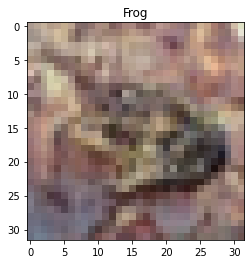

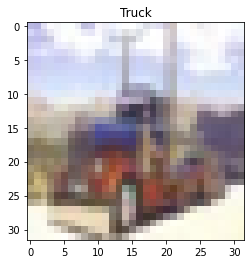

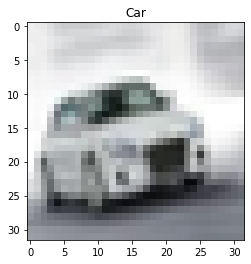

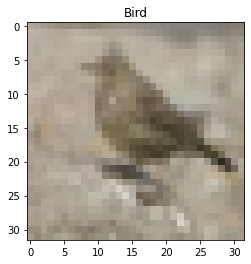

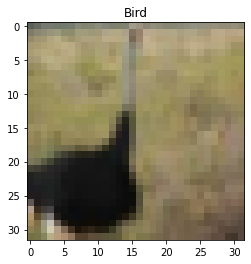

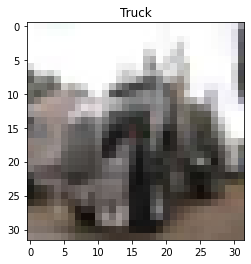

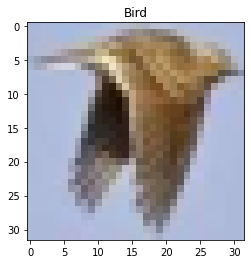

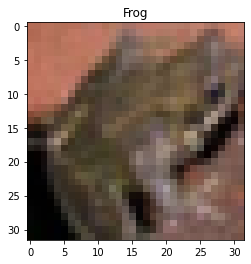

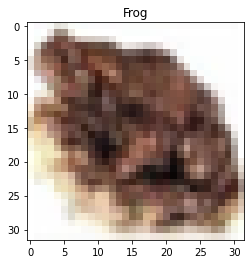

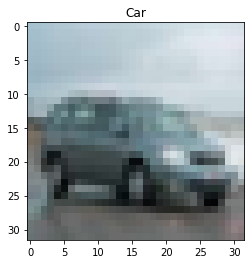

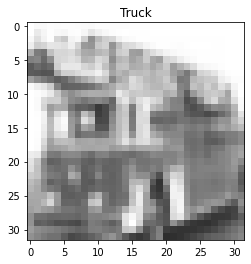

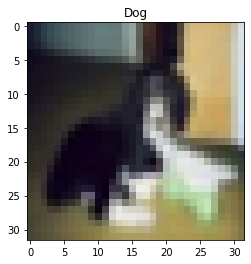

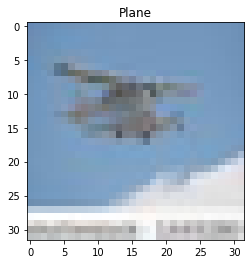

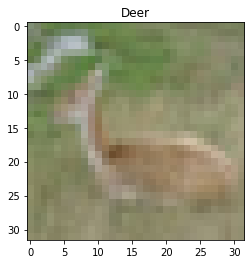

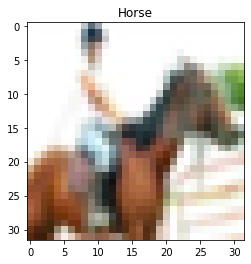

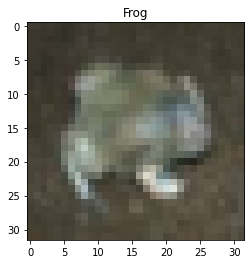

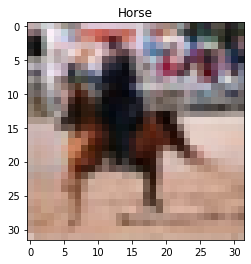

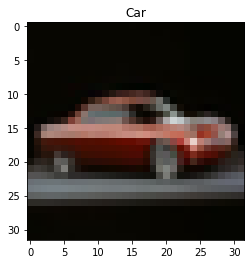

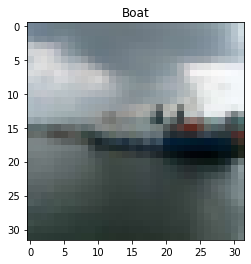

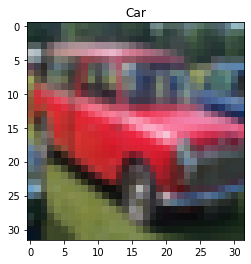

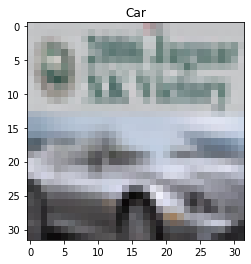

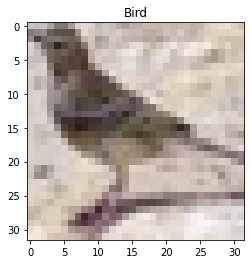

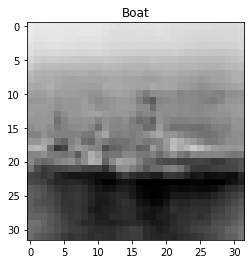

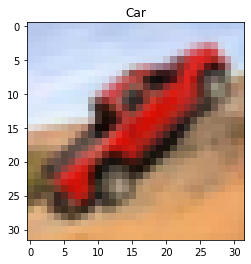

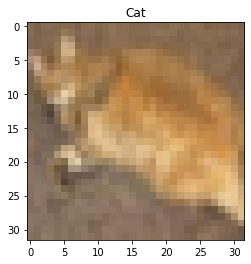

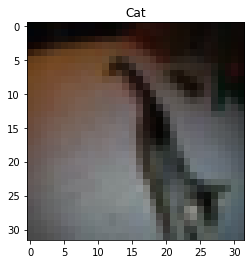

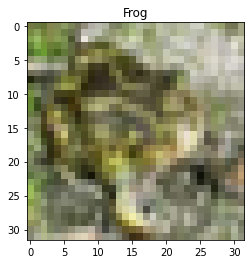

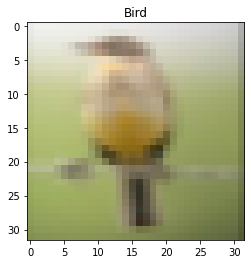

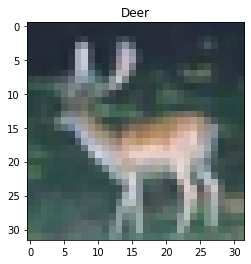

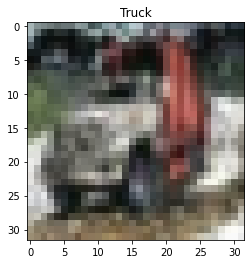

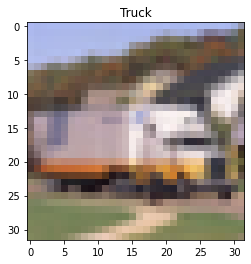

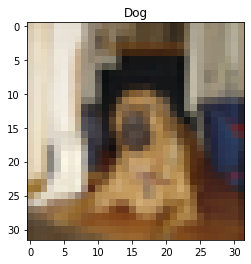

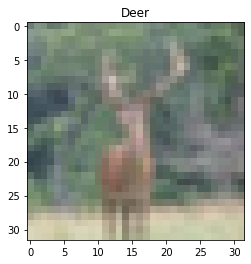

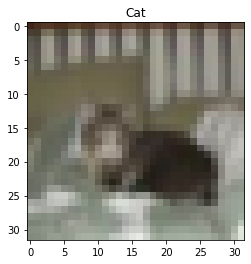

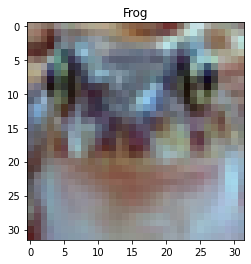

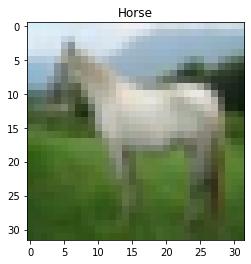

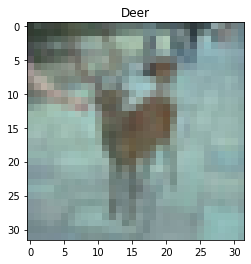

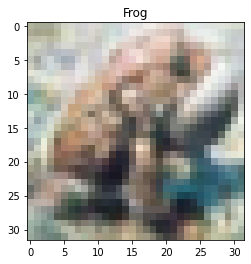

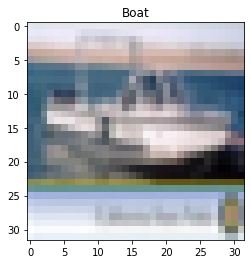

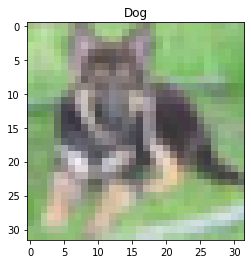

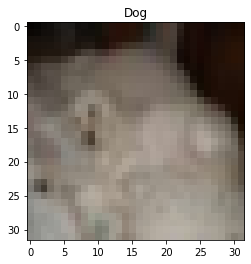

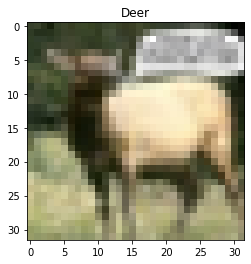

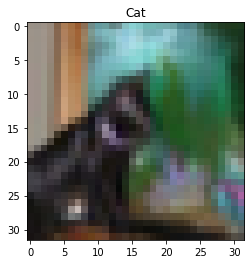

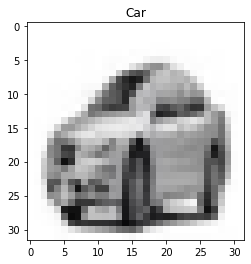

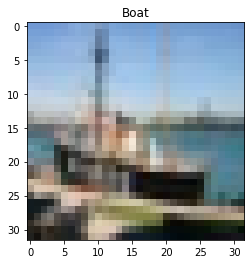

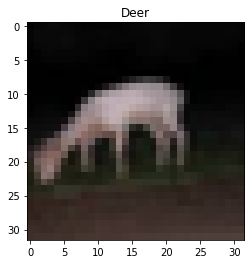

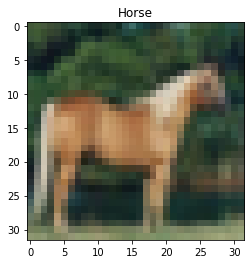

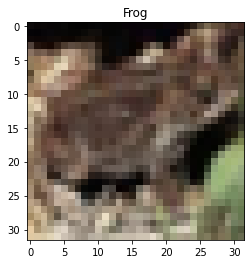

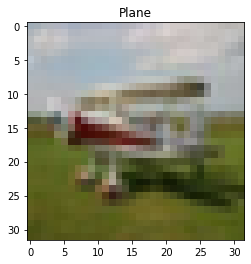

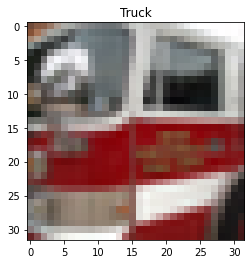

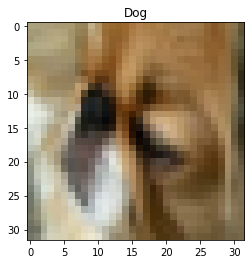

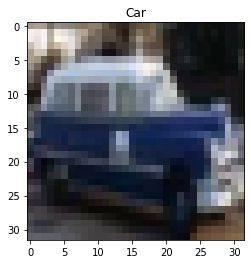

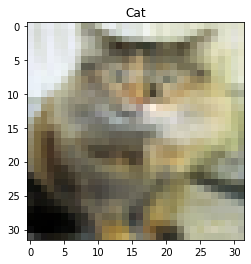

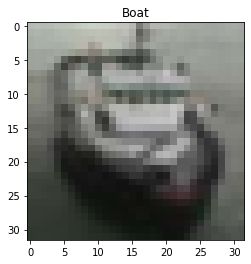

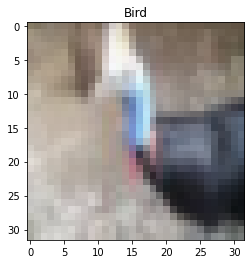

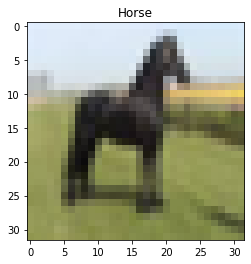

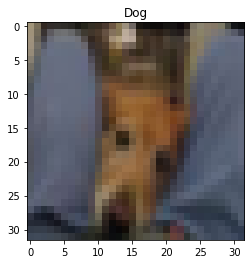

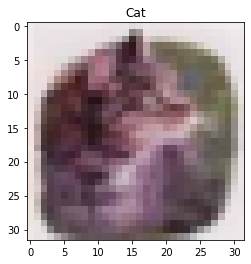

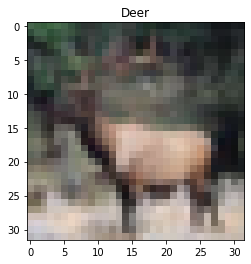

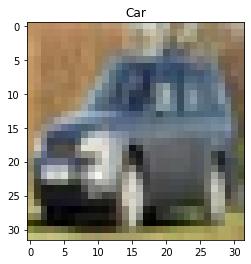

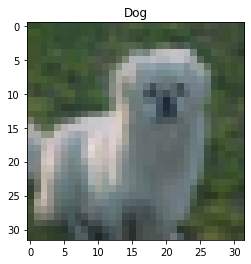

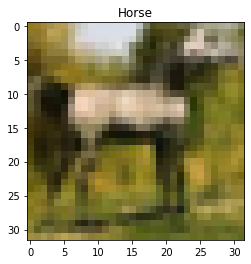

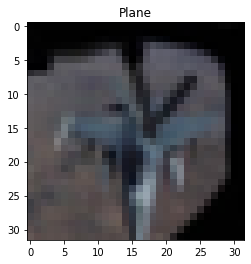

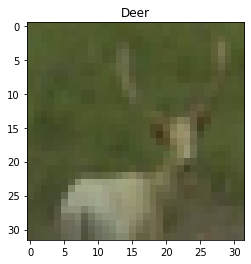

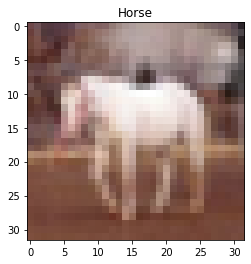

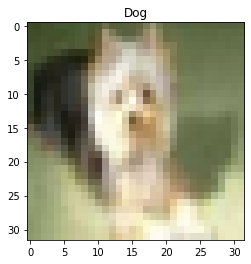

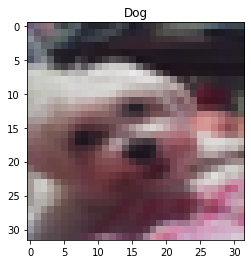

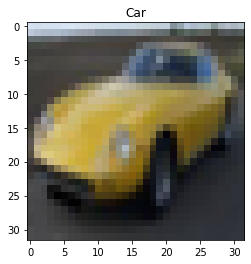

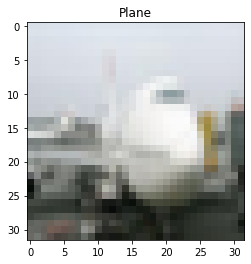

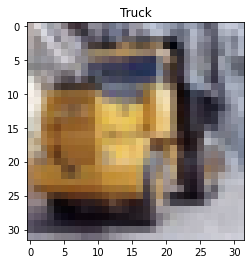

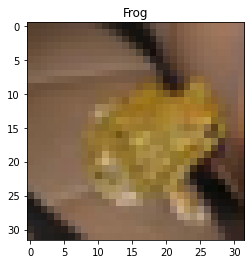

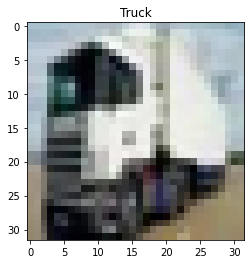

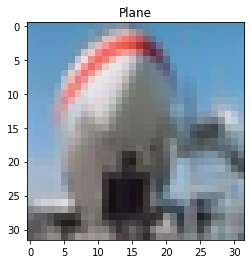

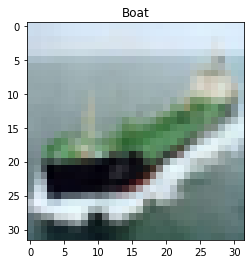

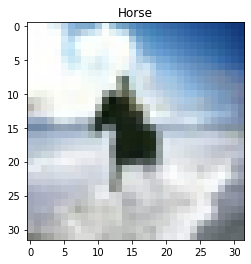

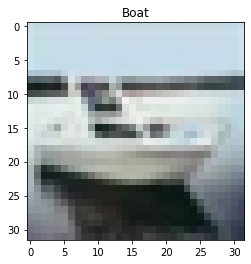

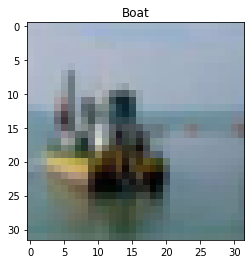

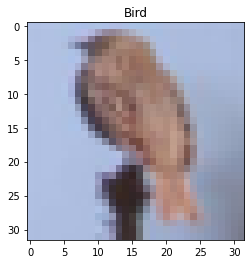

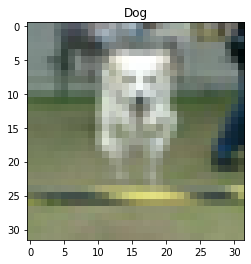

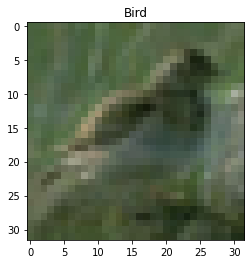

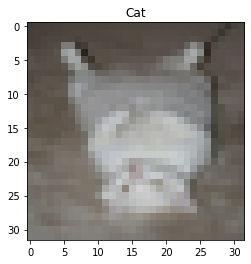

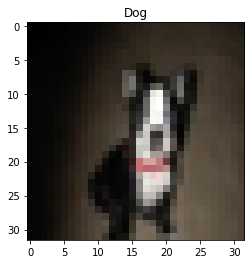

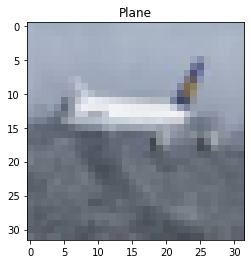

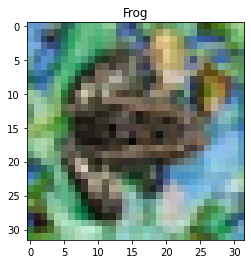

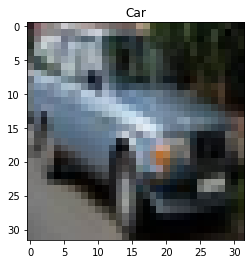

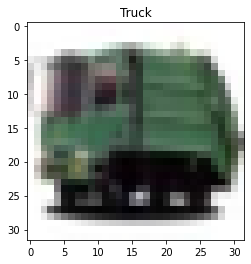

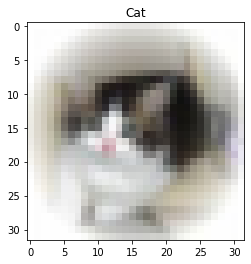

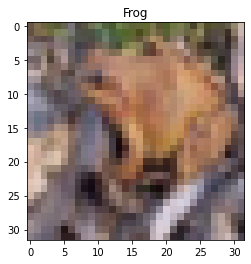

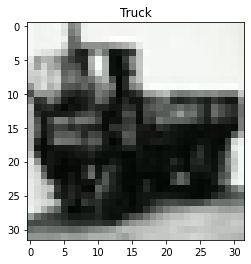

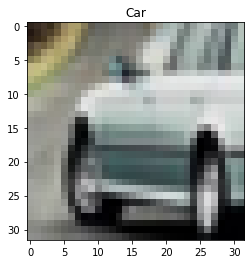

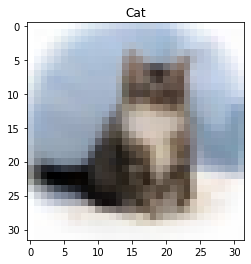

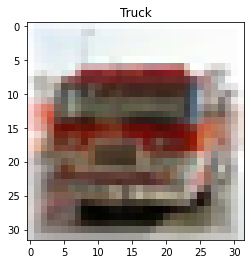

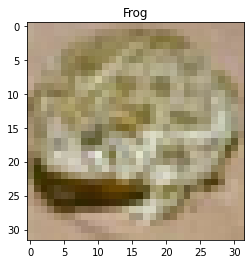

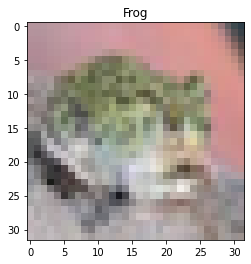

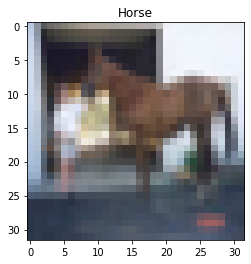

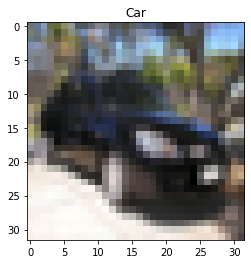

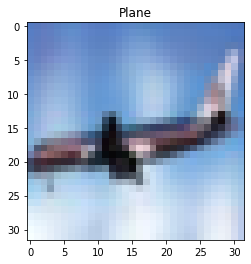

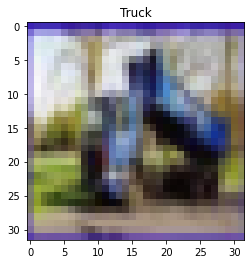

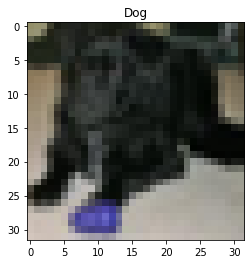

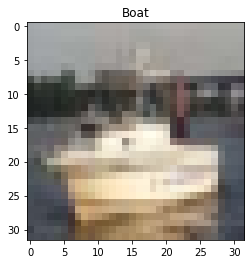

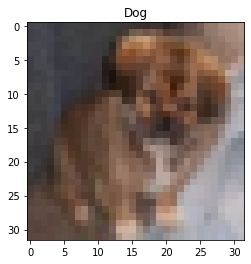

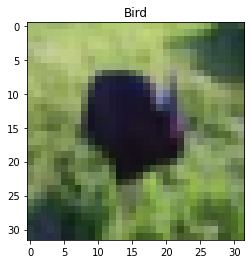

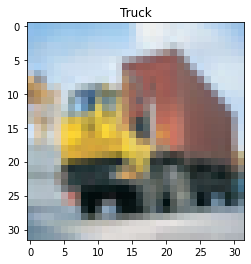

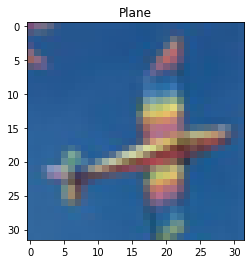

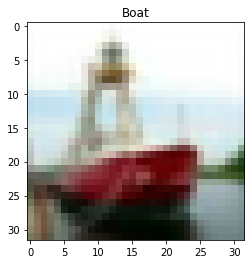

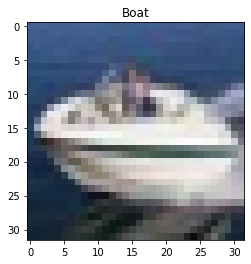

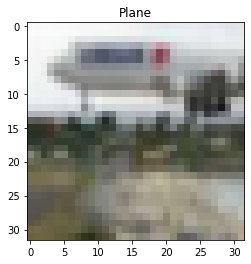

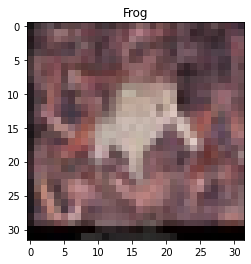

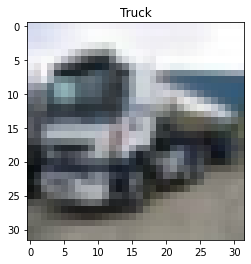

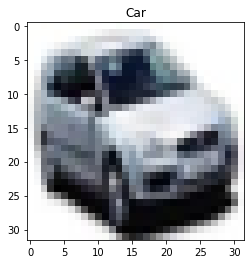

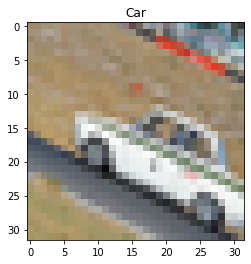

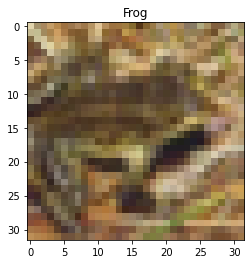

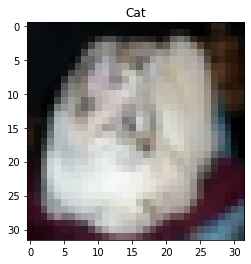

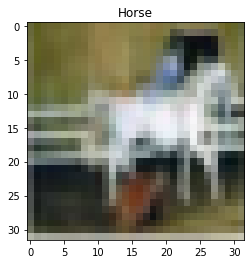

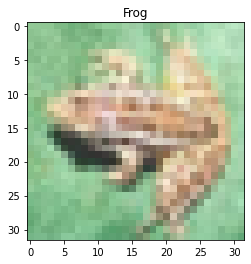

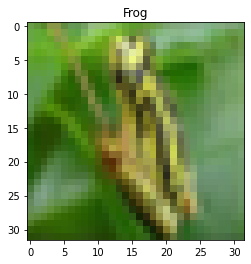

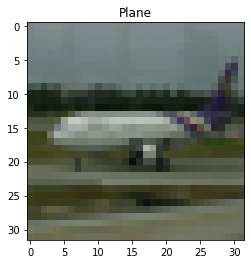

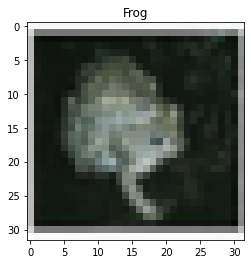

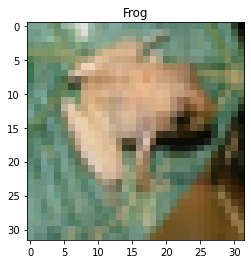

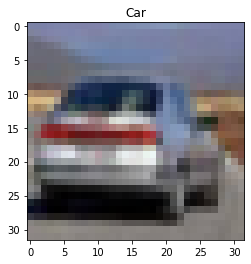

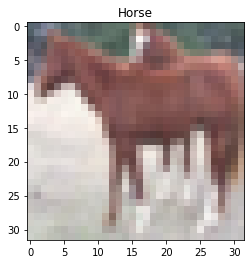

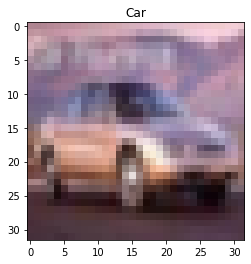

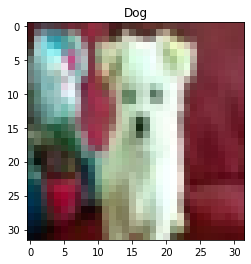

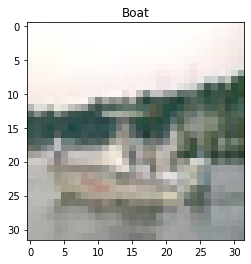

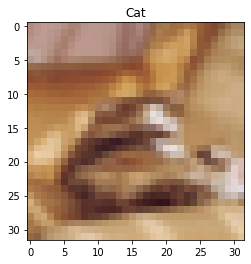

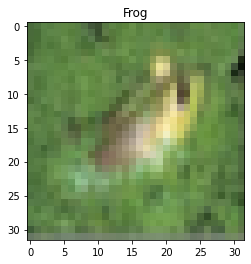

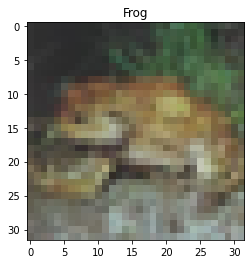

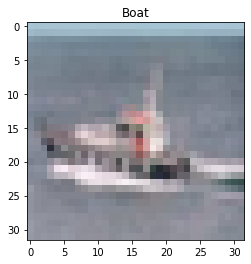

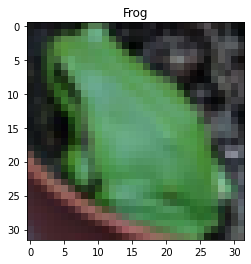

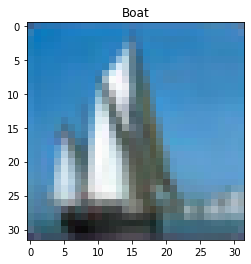

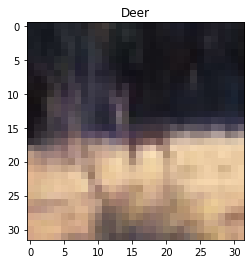

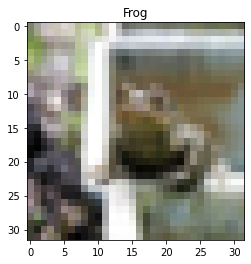

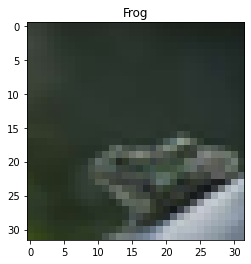

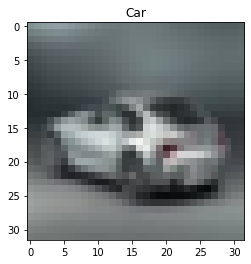

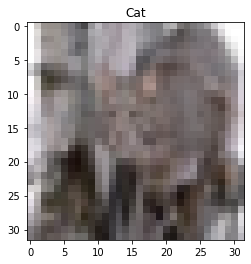

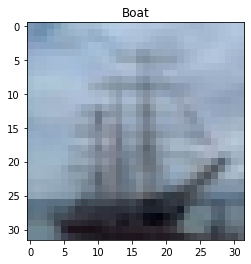

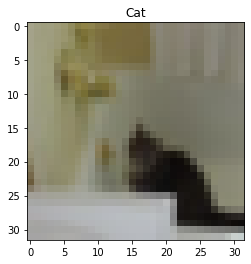

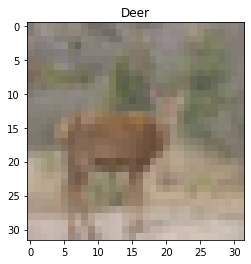

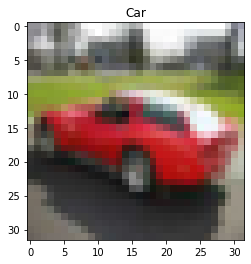

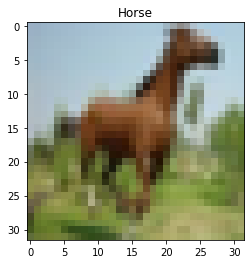

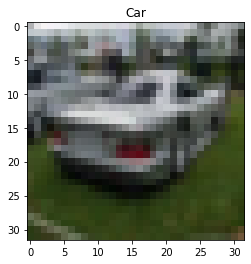

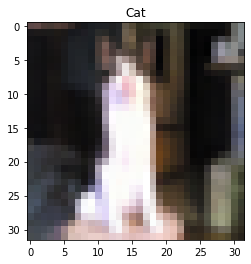

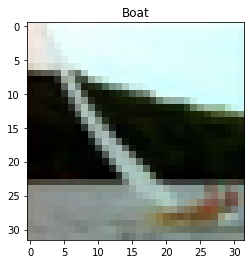

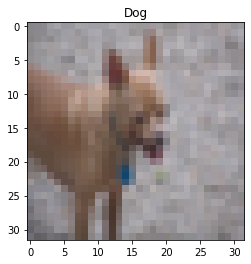

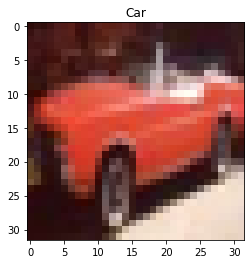

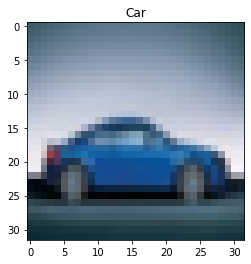

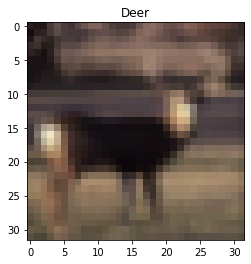

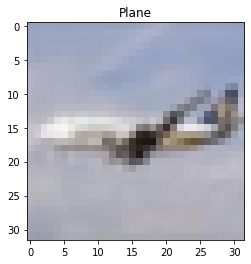

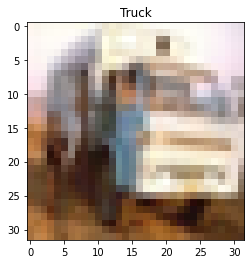

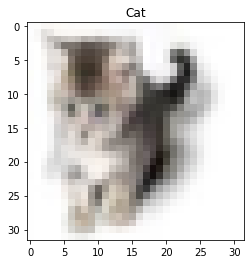

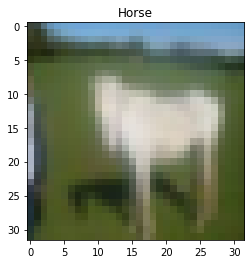

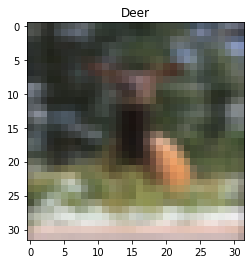

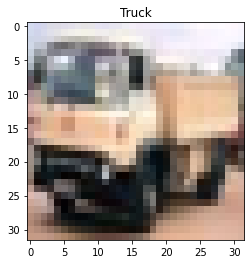

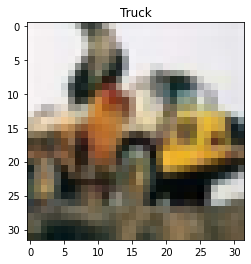

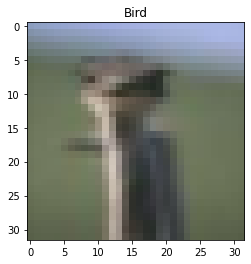

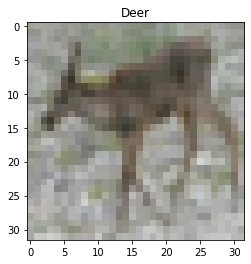

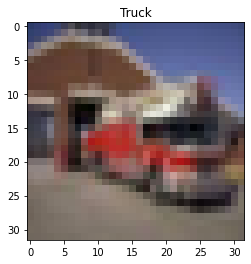

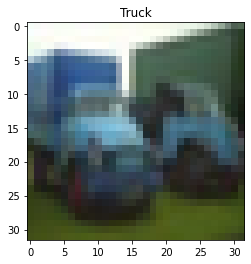

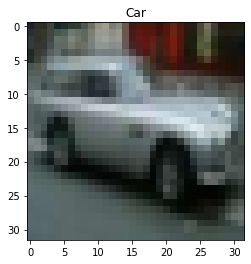

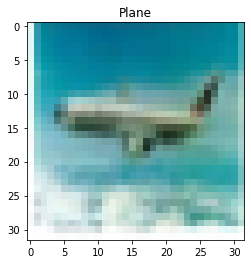

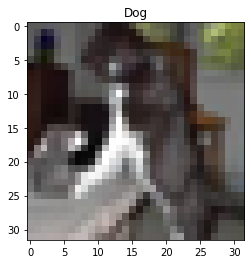

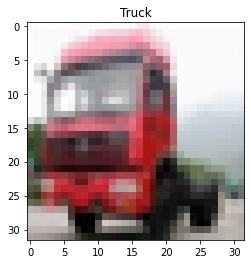

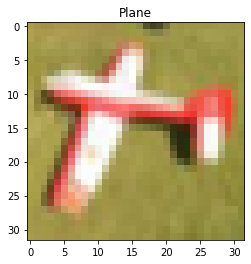

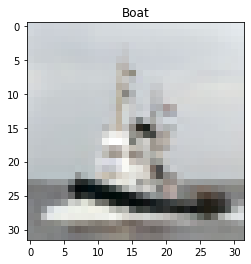

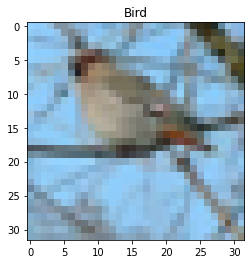

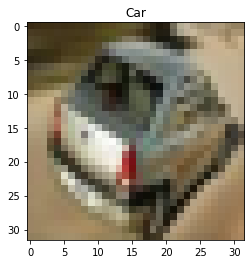

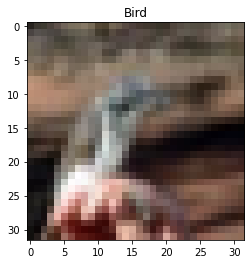

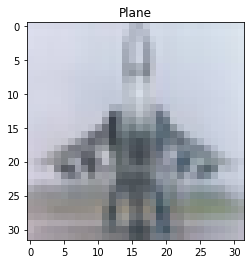

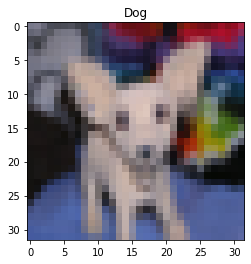

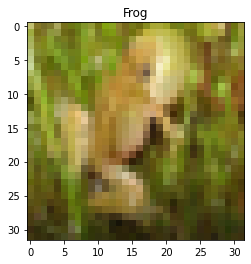

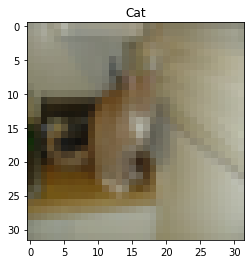

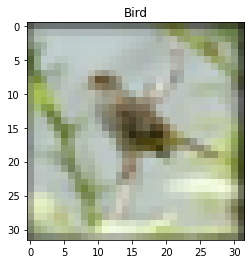

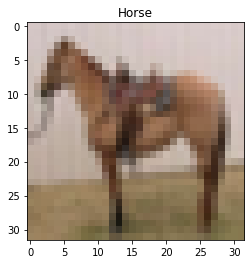

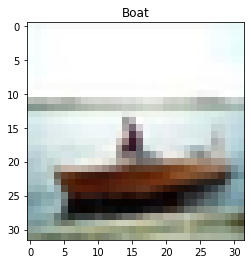

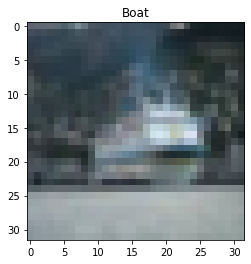

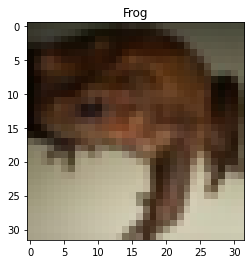

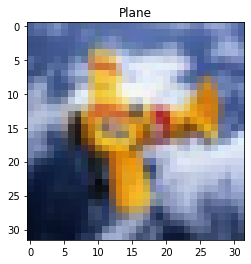

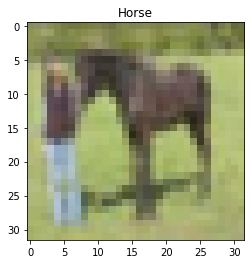

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [4]:
# Loop through each picture in the data set
for i in range(1000):
    sample_image = x_train[i]
    image_class_number = y_train[i][0]
    image_class_name = cifar10_class_names[image_class_number]

    plt.imshow(sample_image)
    plt.title(image_class_name)
    plt.show()


# preprocess dataset

In [12]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.utils import np_utils

In [6]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [13]:
# Convert class vectors to binary class matrices
# labels are single values from 0 to 9.
# we want each label to be an array with on element set to 1 and and the rest set to 0.
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)


# Create Dense layer

In [20]:
# Create a model and add layers
model = Sequential()

#Convulational layer
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation="relu"))
#add maxpooling (its reducing the size)
model.add(MaxPooling2D(pool_size=(2, 2)))
#add Dropout layer
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
#add max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#add drop out layer
model.add(Dropout(0.25))

model.add(Flatten())
#Dense layer
model.add(Dense(512, activation="relu"))
#dropout layer
model.add(Dropout(0.5))
#Dense layer
model.add(Dense(10, activation="softmax"))


In [21]:
# Print a summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

# Compile The model

In [22]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [23]:
# Print a summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

# Train The model

In [24]:
# Train the model
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True
)

Epoch 1/30
1563/1563 [==============================] - 86s 54ms/step - loss: 1.5212 - accuracy: 0.4439 - val_loss: 1.1516 - val_accuracy: 0.5879
Epoch 2/30
1563/1563 [==============================] - 108s 69ms/step - loss: 1.1115 - accuracy: 0.6068 - val_loss: 1.0082 - val_accuracy: 0.6399
Epoch 3/30
1563/1563 [==============================] - 123s 78ms/step - loss: 0.9574 - accuracy: 0.6633 - val_loss: 0.8151 - val_accuracy: 0.7164
Epoch 4/30
1563/1563 [==============================] - 153s 98ms/step - loss: 0.8711 - accuracy: 0.6939 - val_loss: 0.8187 - val_accuracy: 0.7118
Epoch 5/30
1563/1563 [==============================] - 153s 98ms/step - loss: 0.8051 - accuracy: 0.7183 - val_loss: 0.7657 - val_accuracy: 0.7332
Epoch 6/30
1563/1563 [==============================] - 160s 102ms/step - loss: 0.7663 - accuracy: 0.7313 - val_loss: 0.7143 - val_accuracy: 0.7531
Epoch 7/30
1563/1563 [==============================] - 179s 114ms/step - loss: 0.7169 - accuracy: 0.7488 - val_loss: 

In [25]:
# Save neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("model_weights.h5")